# Image filtering and correction
## Tasks
* Substract from the original image its filtered copy
* Filter Lena from salt and pepper
* Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
,where G - gaussian, sigma - coef of blurring, * - convolution
remapping of image from (-1,1) to (0,255) with I = 255*I + 127


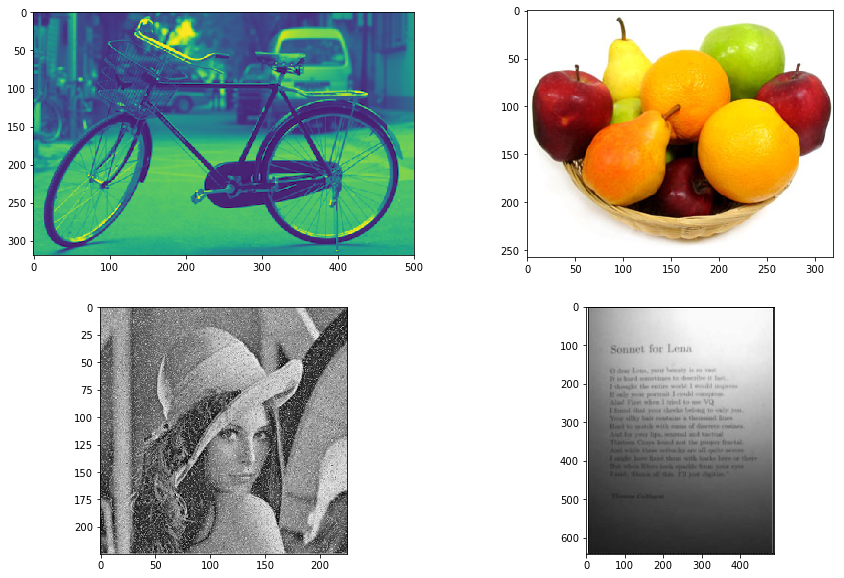

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imbyc)
plt.subplot(222)
plt.imshow(imfru)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
plt.imshow(imbook)


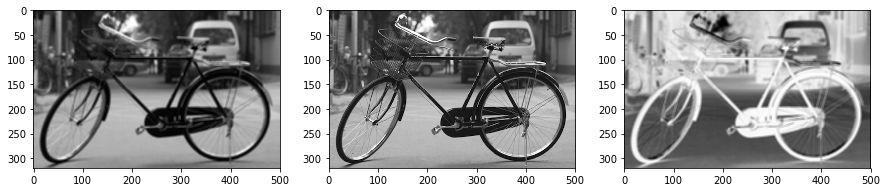

In [21]:
from scipy import ndimage
import numpy as np
k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imbyc, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-flt),cmap='gray')


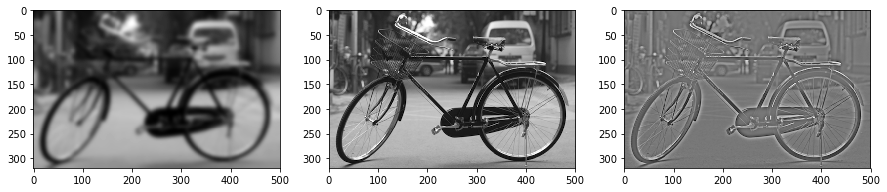

In [14]:
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imbyc, sigma=4)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-gflt),cmap='gray')

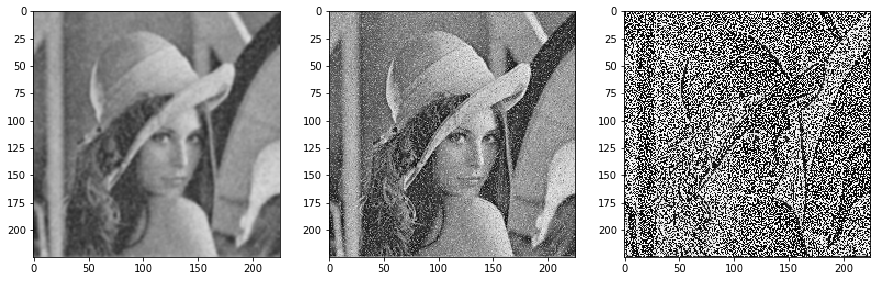

In [50]:
# Lena and Gauss
from scipy import ndimage as nimg
import numpy as np
gfltL = nimg.gaussian_filter(imlen, sigma=1.2)
figL = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gfltL, cmap='gray')
plt.subplot(132)
plt.imshow(imlen, cmap='gray')
plt.subplot(133)
plt.imshow((imlen-gfltL),cmap='gray')

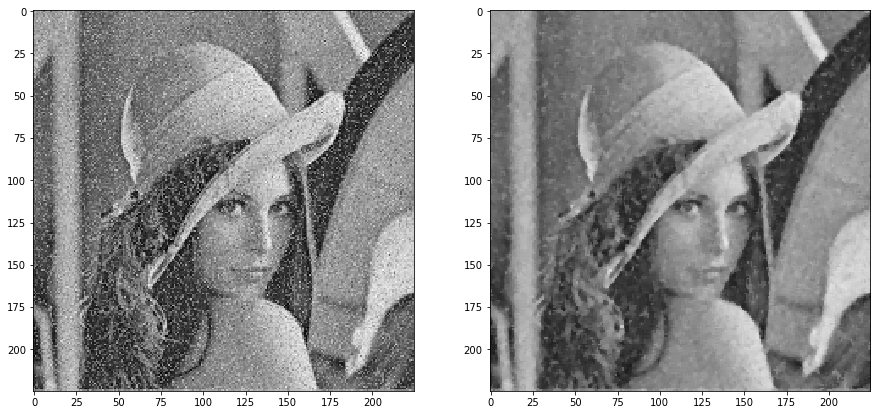

In [44]:
from scipy.ndimage.filters import median_filter
newL = median_filter(imlen, 3)
fig = plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(imlen, cmap='gray')
plt.subplot(122)
plt.imshow(newL, cmap='gray')

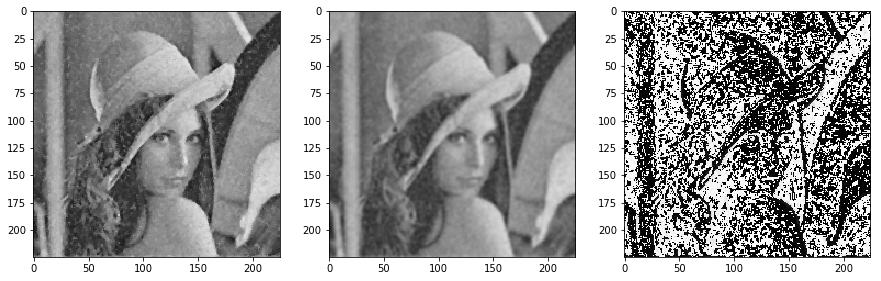

In [51]:
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(newL, cmap='gray')
plt.subplot(132)
plt.imshow(gfltL, cmap='gray')
plt.subplot(133)
plt.imshow((newL-gfltL),cmap='gray')

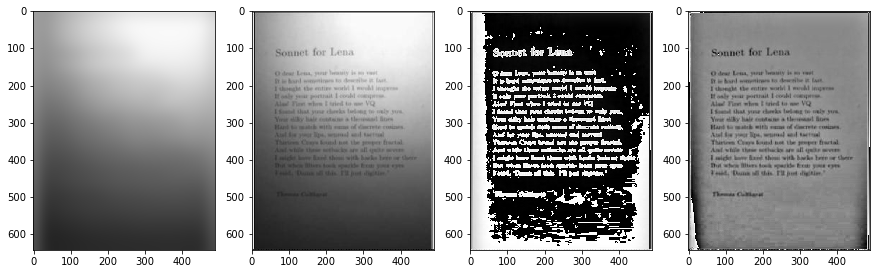

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as nimg
import numpy as nmp
imbk = img.imread('./book.png')
gflt = nimg.gaussian_filter(imbk, sigma=20)
fig = plt.figure(figsize=(15,10))
plt.subplot(141)
plt.imshow(gflt, cmap='gray')
plt.subplot(142)
plt.imshow(imbk, cmap='gray')
plt.subplot(143)
plt.imshow((imbk-gflt),cmap='gray')
mxVl = (imbk-gflt).max()
mnVl = (imbk-gflt).min()
diff = nmp.log2(imbk)-nmp.log2(gflt)
newIm = (diff-mnVl)/(mxVl-mnVl)
plt.subplot(144)
plt.imshow(newIm,cmap='gray')
plt.show()